In [86]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

#import os

#### 2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [87]:
duq = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [88]:
duq.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [89]:
duq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DUQ_MW  119068 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


Видим, что данные у нас числовые, формат float64, который возможно заменить на int, если отсутствуют сотые доли.

Проверим, есть ли числа в наших данных с сотыми долями: 

In [90]:
for i in duq['DUQ_MW']:
    if i.is_integer():
        continue
    else:
        print('no')

Таких данных не обнаружено, поэтому можем отформатировать числа в int:

In [91]:
duq['DUQ_MW'] = duq['DUQ_MW'].astype('int')
duq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   DUQ_MW  119068 non-null  int32
dtypes: int32(1)
memory usage: 1.4 MB


In [92]:
duq.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


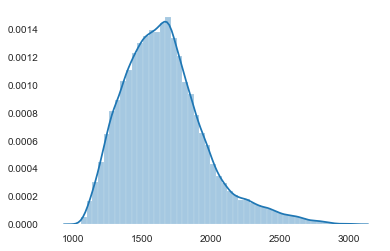

In [93]:
sns.distplot(duq.values)

Видим, что распределение потребения энергии близко к нормальному.

In [94]:
duq['DUQ_MW'].isnull().sum()

0

Видим, что пропущенных значений нет

Text(0, 0.5, 'МВт')

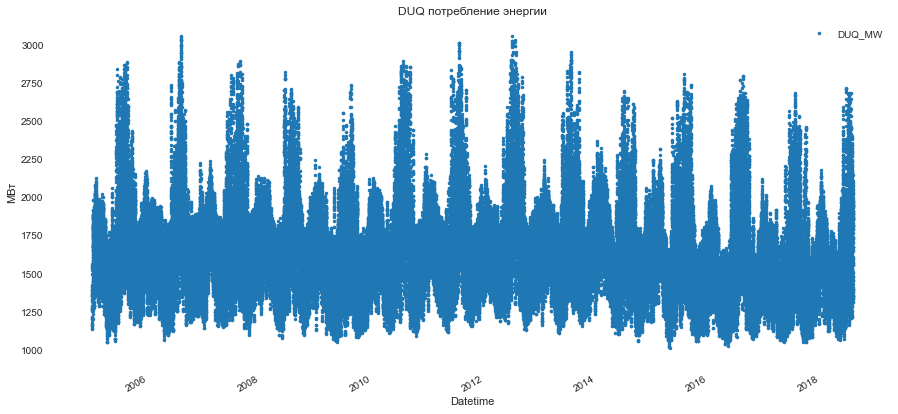

In [95]:
duq.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ потребление энергии' )
plt.ylabel ( 'МВт' )

На основании полученного графика можем заключить, что в данных есть циклы.
Также видим, что выбросов как таковых не наблюдается. 

In [96]:
import pandas_profiling
pandas_profiling.ProfileReport(duq)

c:\users\root\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\IPython\core\display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


#### 3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [97]:
brent = pd.read_excel('brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [98]:
brent.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2019-09-01 to 2010-09-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Значение  2667 non-null   float64
dtypes: float64(1)
memory usage: 41.7 KB


In [99]:
brent['Значение'].isnull().sum()

0

Text(0, 0.5, '$')

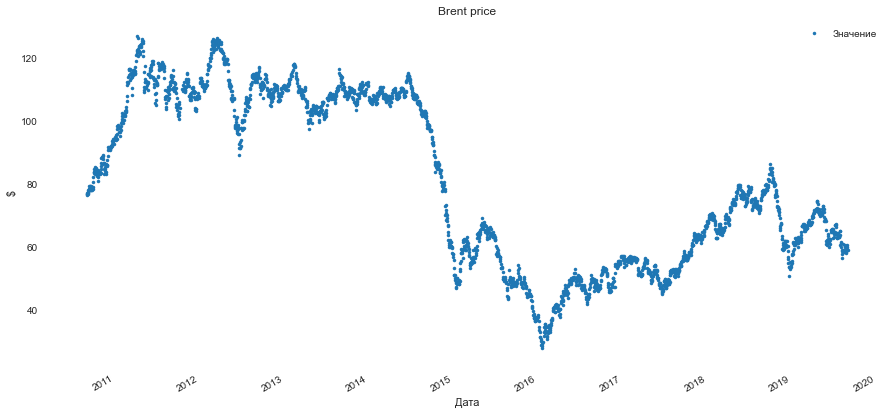

In [100]:
brent.plot( style = '.', figsize = ( 15, 7 ), title = 'Brent price' )
plt.ylabel ( '$' )

In [101]:
mounth_brent = brent.resample("M").mean()
mounth_brent.head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


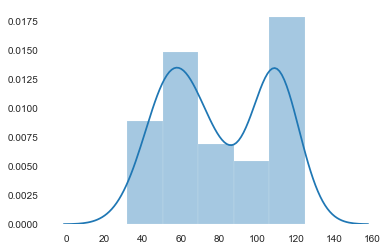

In [102]:
sns.distplot(mounth_brent.values)

Распределение данных по нефти похоже на слияние двух графиков нормального распределения... 

Text(0, 0.5, '$')

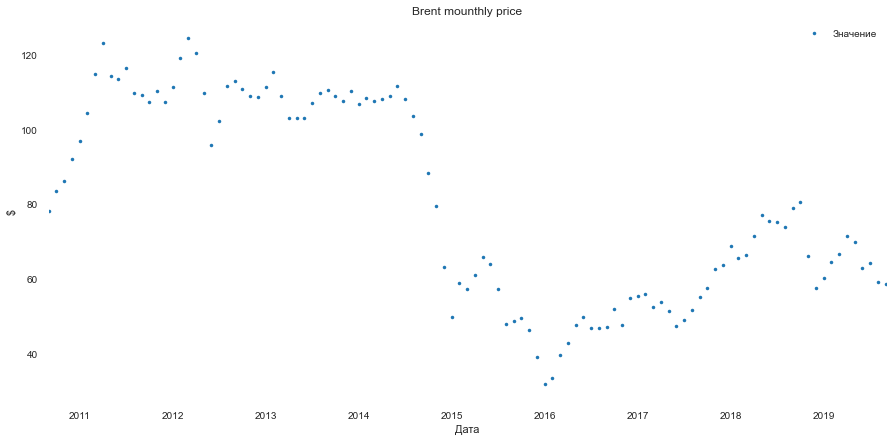

In [103]:
mounth_brent.plot( style = '.', figsize = ( 15, 7 ), title = 'Brent mounthly price' )
plt.ylabel ( '$' )

In [104]:
week_brent = brent.resample("W").mean()
week_brent.head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


In [105]:
week_brent.values

array([[ 76.616     ],
       [ 77.67333333],
       [ 78.69333333],
       [ 78.51833333],
       [ 81.21166667],
       [ 84.14666667],
       [ 83.49833333],
       [ 82.795     ],
       [ 83.36166667],
       [ 87.00333333],
       [ 87.77666667],
       [ 84.76833333],
       [ 85.07333333],
       [ 89.31166667],
       [ 90.954     ],
       [ 91.63666667],
       [ 93.53833333],
       [ 93.96833333],
       [ 94.558     ],
       [ 97.83333333],
       [ 97.44      ],
       [ 97.71333333],
       [101.12166667],
       [101.03666667],
       [103.03666667],
       [110.68666667],
       [115.305     ],
       [114.45      ],
       [112.93166667],
       [115.565     ],
       [116.248     ],
       [123.38333333],
       [122.57      ],
       [123.078     ],
       [124.78833333],
       [116.16666667],
       [113.86833333],
       [111.495     ],
       [113.438     ],
       [115.54833333],
       [117.29833333],
       [115.18833333],
       [109.14333333],
       [110

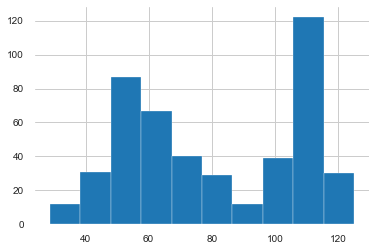

In [106]:
week_brent['Значение'].hist()

Text(0, 0.5, '$')

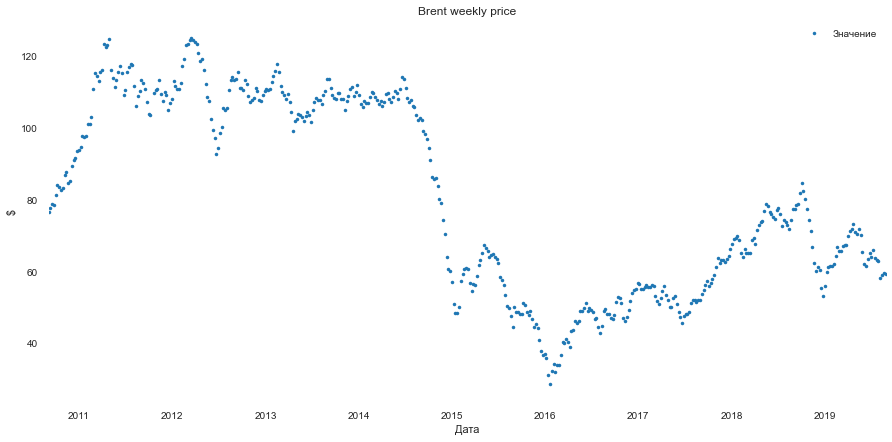

In [107]:
week_brent.plot( style = '.', figsize = ( 15, 7 ), title = 'Brent weekly price' )
plt.ylabel ( '$' )

In [108]:
year_brent = brent.resample("Y").mean()
year_brent.head()

,Значение
Дата,
2010-12-31,84.963238
2011-12-31,110.758746
2012-12-31,111.377484
2013-12-31,108.137114
2014-12-31,99.435493


#### 4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

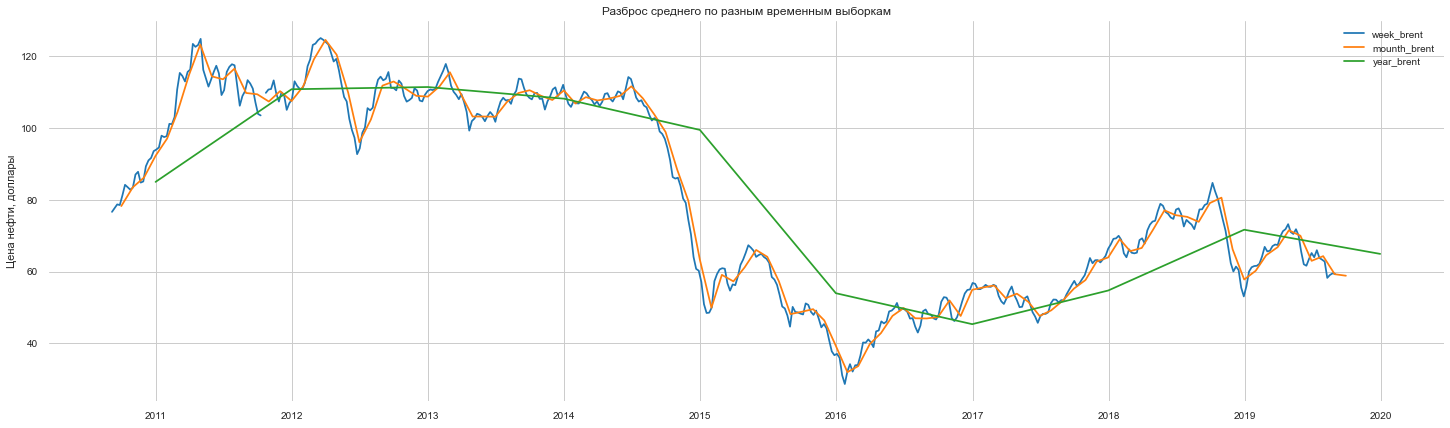

In [109]:
plt.figure( figsize=( 25, 7 ))

plt.ylabel('Цена нефти, доллары')
plt.plot(week_brent.index, week_brent, label='week_brent' ) #week_brent.index - дата
plt.plot(mounth_brent.index, mounth_brent, label='mounth_brent')
plt.plot(year_brent.index, year_brent, label='year_brent')
plt.title( 'Разброс среднего по разным временным выборкам' )
plt.grid()
plt.legend()


Интересно, что на этом графике в понедельном окне отчетливо видно пропуск в 2011 году. Взглянем на него подробнее.

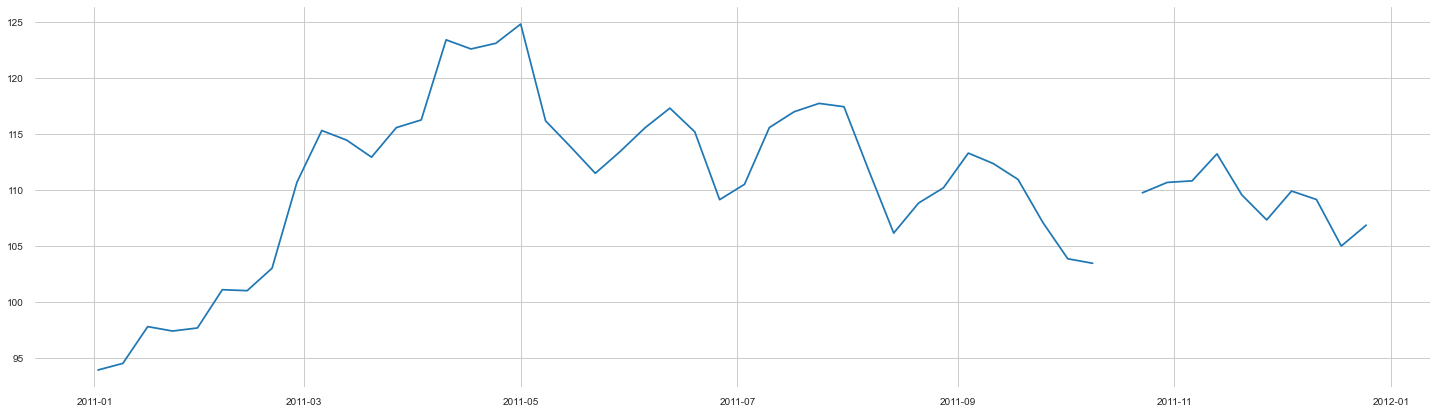

In [110]:
wbrent2011 = week_brent[week_brent.index.year == 2011]

plt.figure( figsize=( 25, 7 ))
plt.plot(wbrent2011.index, wbrent2011, label='week brent 2011')
plt.grid()

Итак, пропуск обнаружен между 9 и 11 месяцами.

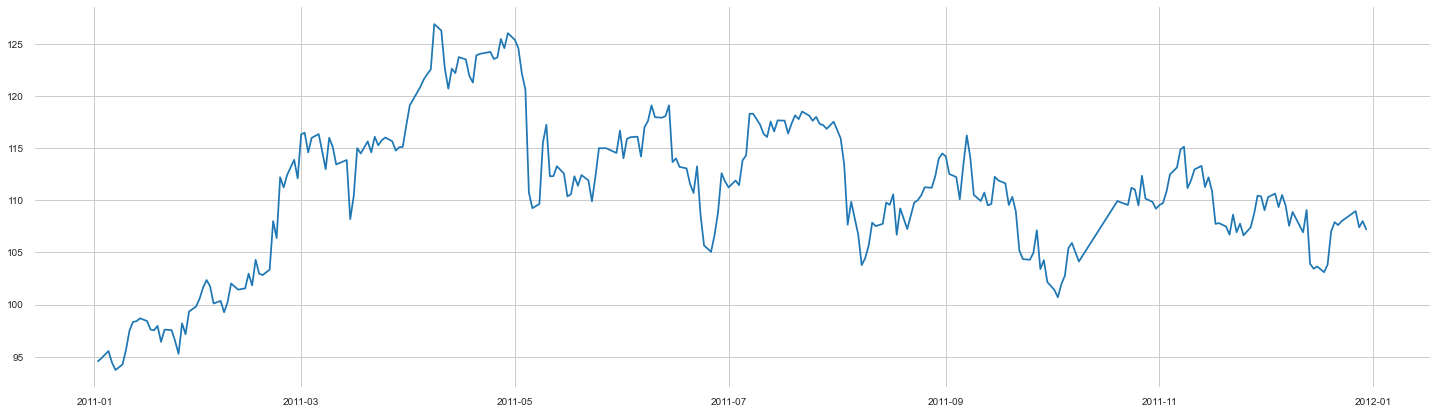

In [111]:
brent2011 = brent[brent.index.year == 2011]
plt.figure( figsize=( 25, 7 ))
plt.plot(brent2011.index, brent2011, label='brent 2011')
plt.grid()

Однако, на годовом графике никаких прерывистых мест мы не обнаруживаем. Посмотрим на 10-й и 11-й месяца отддельно.

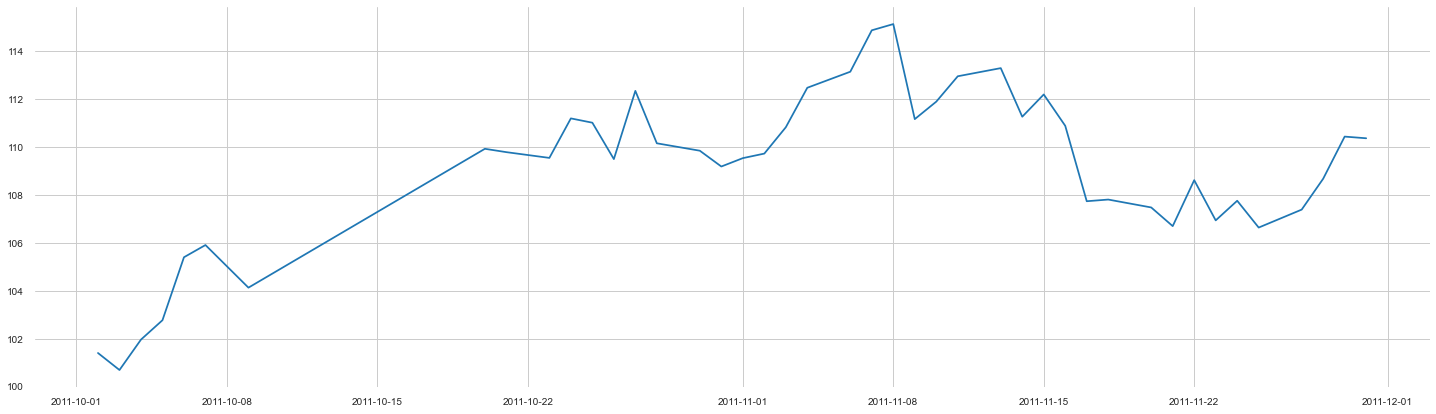

In [112]:
brent2011 = brent[(brent.index.year == 2011) & ((brent.index.month == 11)|(brent.index.month == 10))]
plt.figure( figsize=( 25, 7 ))
plt.plot(brent2011.index, brent2011, label='brent 10.2011')
plt.grid()

Как видим, прерывистых мест на графике нет.

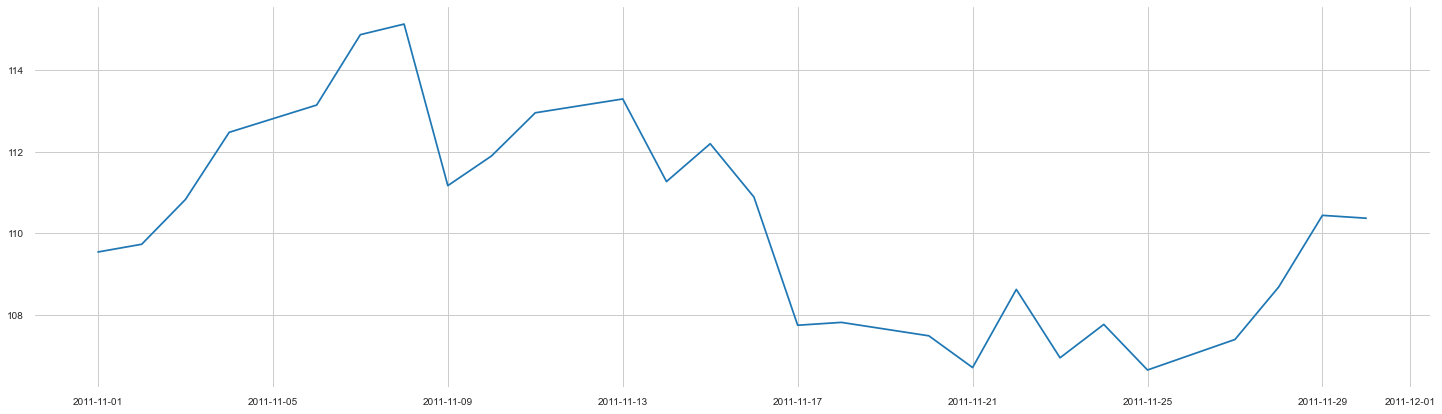

In [113]:
brent2011 = brent[(brent.index.year == 2011) & (brent.index.month == 11)]
plt.figure( figsize=( 25, 7 ))
plt.plot(brent2011.index, brent2011, label='brent 10.2011')
plt.grid()

In [114]:
brent['date'] = brent.index
brent.head()

,Значение,date
Дата,,
2019-09-01,58.84,2019-09-01
2019-08-30,59.19,2019-08-30
2019-08-29,60.37,2019-08-29
2019-08-28,59.84,2019-08-28
2019-08-27,59.59,2019-08-27


In [115]:
count_date = brent['date'].value_counts()
count_date.head()

2016-11-14    1
2019-06-23    1
2014-11-28    1
2011-06-26    1
2013-03-08    1
Name: date, dtype: int64

In [116]:
count_date.value_counts()

1    2667
Name: date, dtype: int64

Видимо, что одинаковых дат нет (все по одной). Значит, в один день несколько записей не делали. Тогда непонятно, откуда взялся пропуск...


#### 5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

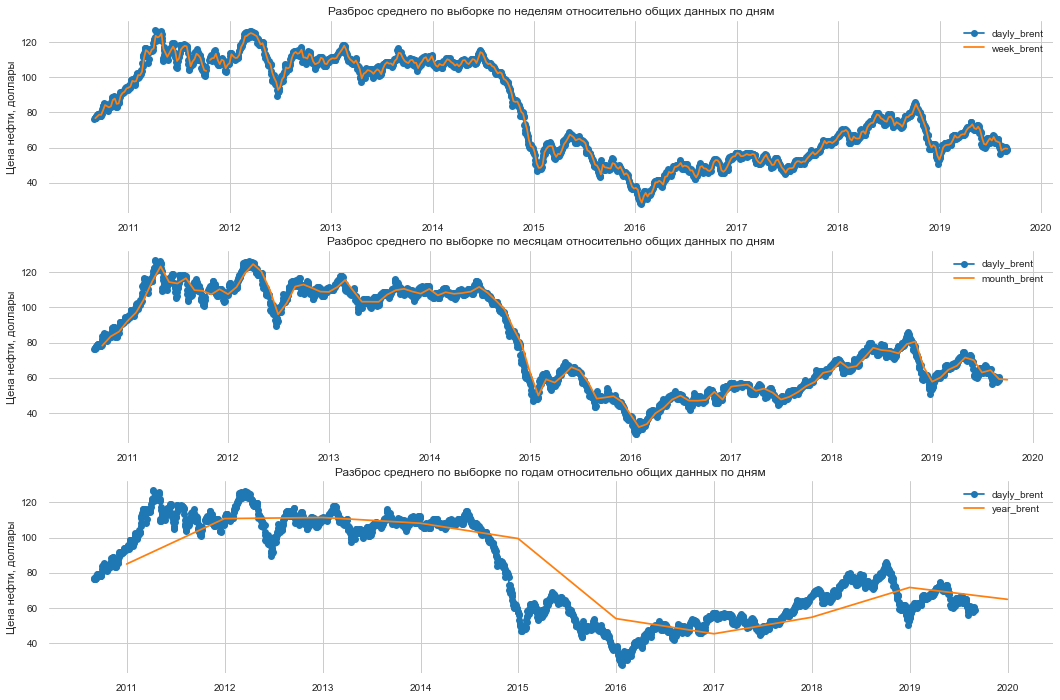

In [146]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(18, 12))
ax1, ax2, ax3 = ax.flatten()

ax1.set_ylabel('Цена нефти, доллары')
ax1.plot(brent.index, brent['Значение'], label='dayly_brent', marker='o')
ax1.plot(week_brent.index, week_brent, label='week_brent' ) #week_brent.index - дата
ax1.set_title( 'Разброс среднего по выборке по неделям относительно общих данных по дням' )
ax1.grid()
ax1.legend()

ax2.set_ylabel('Цена нефти, доллары')
ax2.plot(brent.index, brent['Значение'], label='dayly_brent', marker='o')
ax2.plot(mounth_brent.index, mounth_brent, label='mounth_brent' ) #week_brent.index - дата
ax2.set_title( 'Разброс среднего по выборке по месяцам относительно общих данных по дням' )
ax2.grid()
ax2.legend()

ax3.set_ylabel('Цена нефти, доллары')
ax3.plot(brent.index, brent['Значение'], label='dayly_brent', marker='o')
ax3.plot(year_brent.index, year_brent, label='year_brent' ) #week_brent.index - дата
ax3.set_title( 'Разброс среднего по выборке по годам относительно общих данных по дням' )
ax3.grid()
ax3.legend()


Судя по графикам, мы можем сделать вывод: недельные и месячные графики более сглажены по сравнению с дневными, а месячная подвыборка более сглажена, чем недельная. Это значит, что месячная выборка представляет данные в наиболее обобщенном виде по сравнению с данными на каждый день и средними по неделям. По сути, месячная выборка представляет основные особенности графика данных, но не вдается в детали слишком точно.
Мне было интересно посмотреть, как будет представлен еще и годовой график. И здесь мы видим, наоборот, слишком обобщенную картину, не учитывающую многих важных деталей.